In [5]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split 
#from ggplot import *

In [6]:
df = pd.read_csv("/HR_comma_sep.csv")

##### EDA

In [3]:
df.info()
# There is no missing valye and 3 kinds of data types 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
df.head()
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


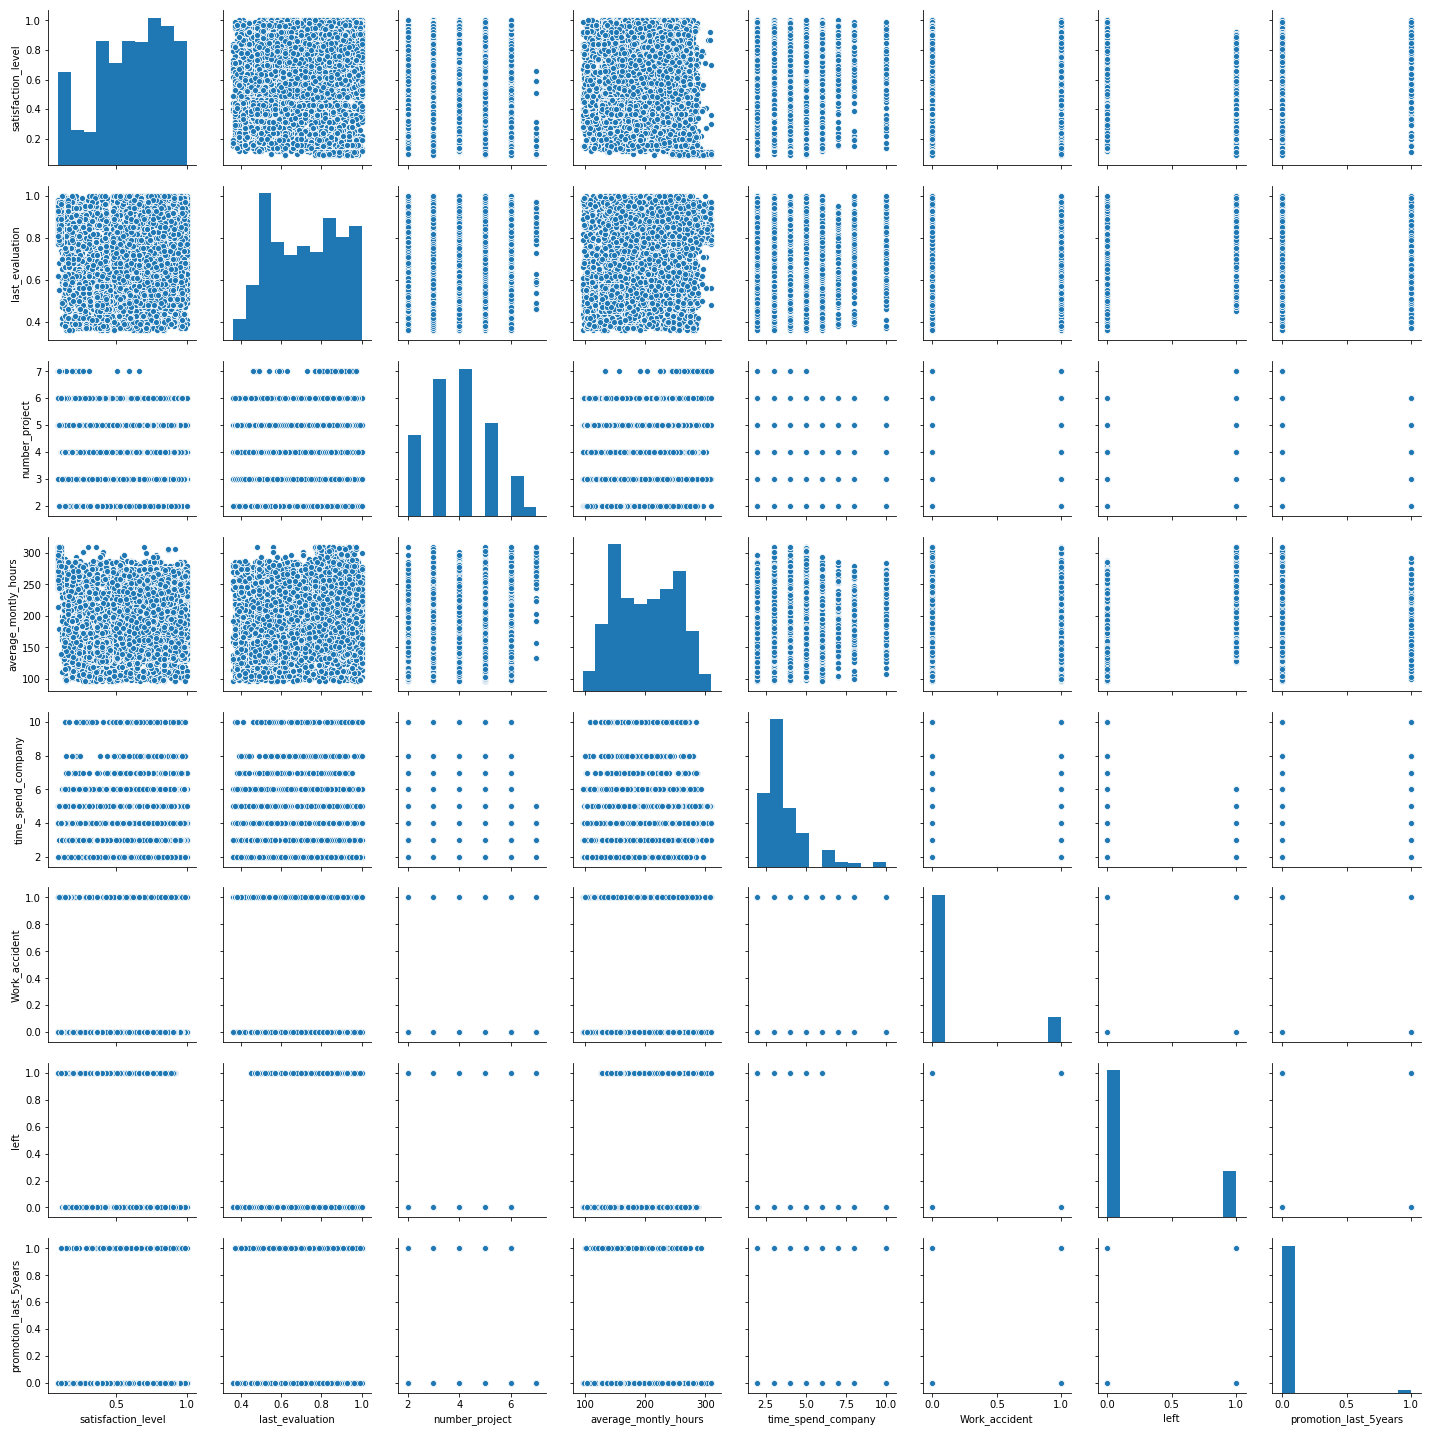

In [5]:
sns.pairplot(df)
# In this graph, we can only get too much information, because the categorical data are vague using scatter plot.
# But we can know the distribution of each variable in this graph.

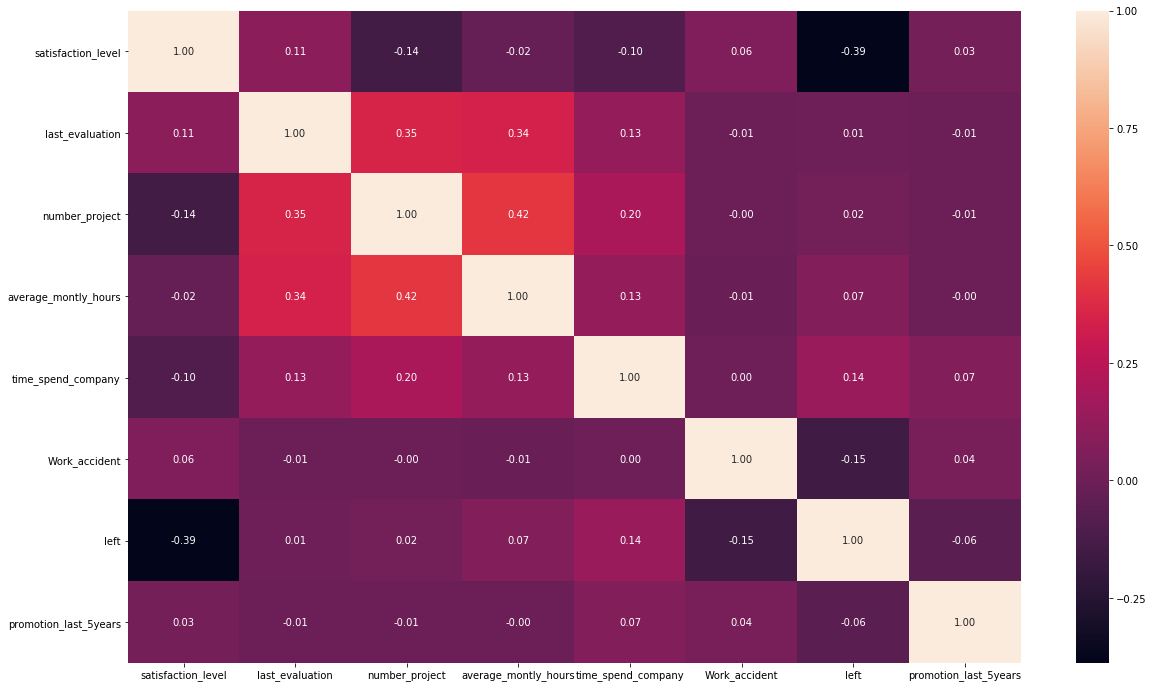

In [6]:
# With df.infor(), we can find variable sales and salary is categorical variables, also the left(response)
df_num = df._get_numeric_data()
fig = plt.figure(figsize=(20,12))
corr = df_num.corr()
cols = df_num.columns
sns.heatmap(corr,cbar= True, annot = True, fmt = '.2f', annot_kws = {'size':10}, yticklabels =cols, xticklabels = cols )
plt.show()
# With the heatmap displayed below, we can found 
# 1.the left doesn't have very strong relationship with other features
# 2.Features are having strong correlation between each other.

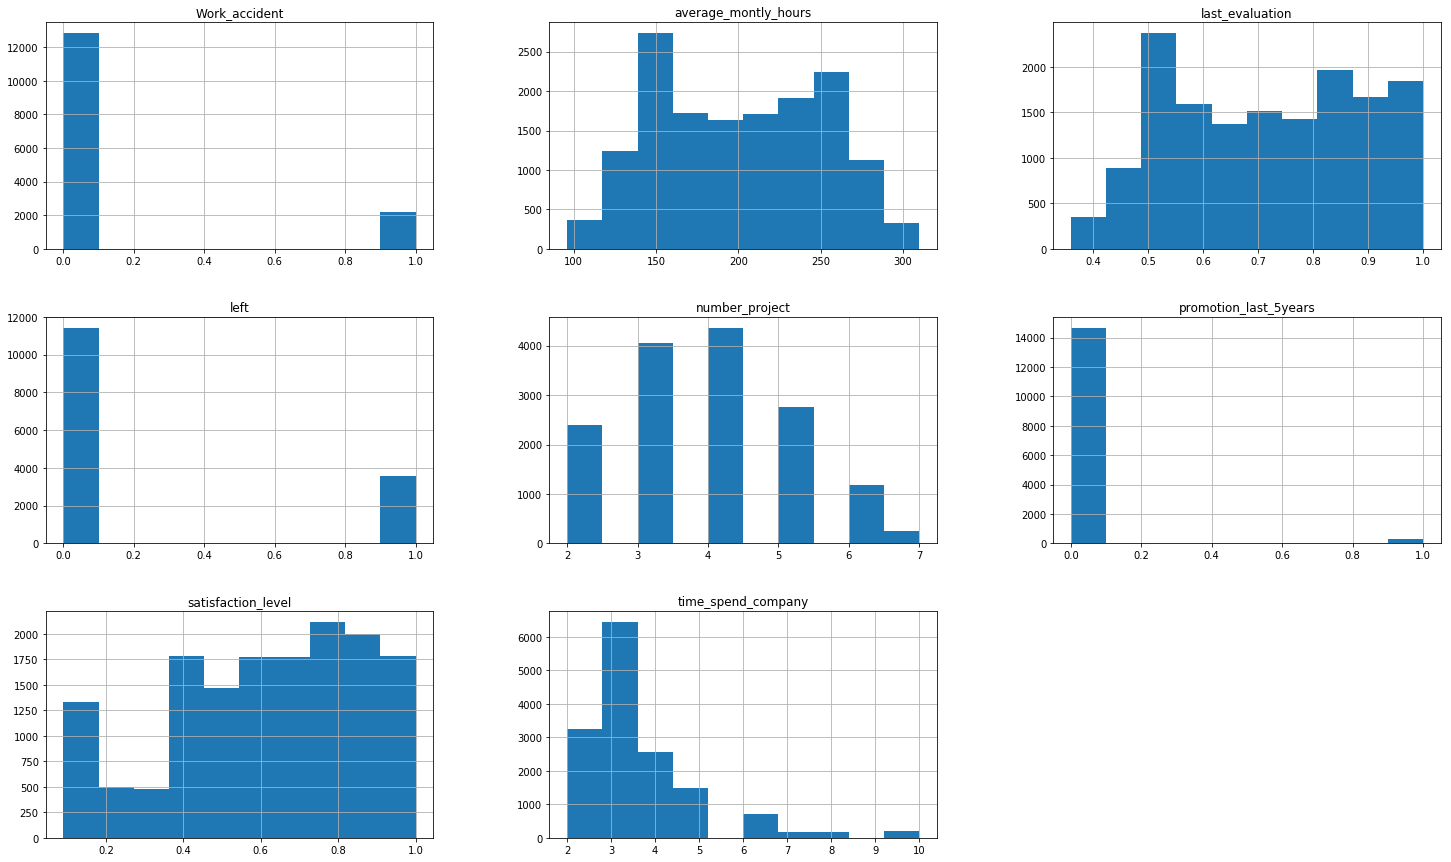

In [108]:
# From the distribution graphs here, we can found:
# 1. The response is not balanced, we have more records that a employee doesn't left rather than the vice.
# 2. Time spent here is a bit skewed, I would considerate buketizing it or adding logrithm to make it more normal. 
#    Or it can be solved by rule-based algorithms. 
df_num.hist()
plt.rcParams['figure.figsize'] = [25, 15]
#plt.show()

In [288]:
df_num["left"].value_counts()
# the imbalance of response is not very serious
# would try to test impact of imbalanced and balanced data
df_num.groupby("left").mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


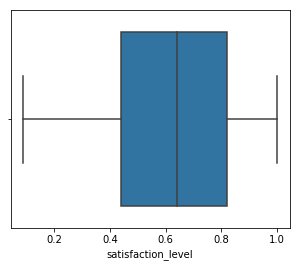

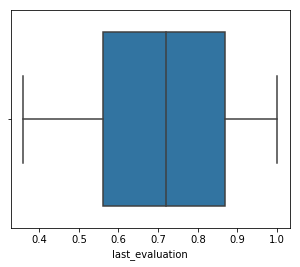

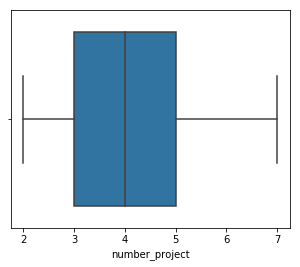

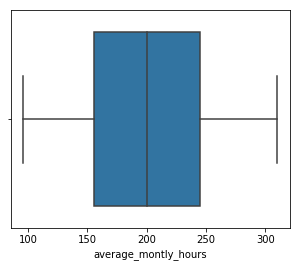

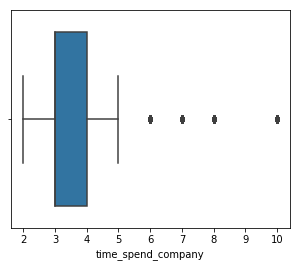

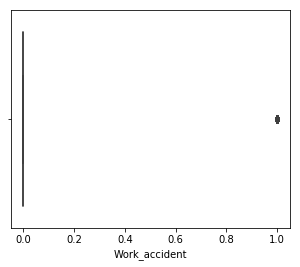

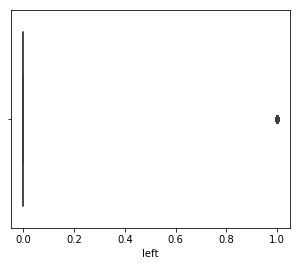

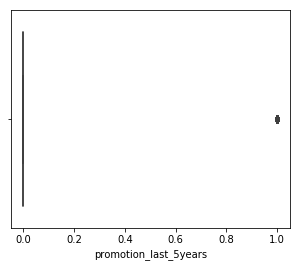

In [9]:
var = ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years']


plt.rcParams['figure.figsize'] = [5, 4]
for i in var:
    sns.boxplot(df[i])
    plt.show()
    
# We can find the time_spend_company variable has outlier.
# Since time_spend_company is skewed, thus I firstly apply a log() function to it

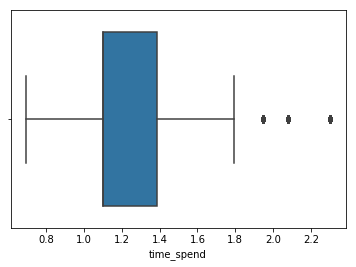

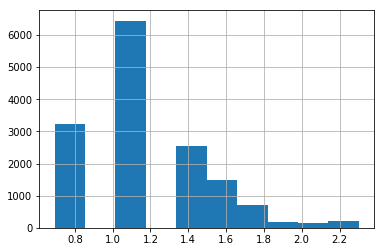

In [7]:
df["time_spend"] = df["time_spend_company"].apply(np.log)
sns.boxplot(df["time_spend"])
plt.show()
df["time_spend"].hist()
# After feature transformation, time_spend still has outliers
# I have three options for this case:
#   (1) repalce the outlier with 90th quantile value
#   (2) bucketize the time_spend to buckets
#   (3) Use rule-based(If-Then) algorithm
# I would try all the three options later

In [15]:
df.sales.unique()
df.sales.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [16]:
df.salary.unique()
df.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [8]:
var_deci = ['satisfaction_level', 'last_evaluation', 'average_montly_hours', 'time_spend_company']
var_cate = ['number_project', 'Work_accident', 'promotion_last_5years',"sales","salary"]

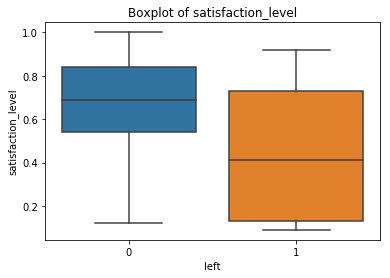

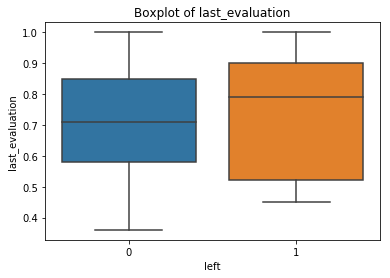

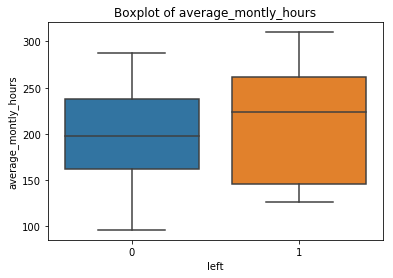

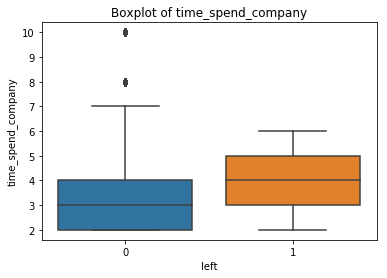

In [9]:
for i in var_deci:
    ax = sns.boxplot(x="left", y= i, data=df)
    plt.title("Boxplot of "+ i)
    plt.show()
# Treat these variables as continuous variable, seem like they have effect on `left or not`

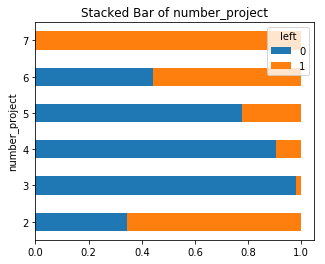

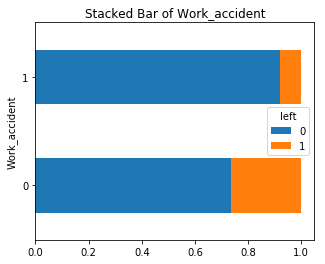

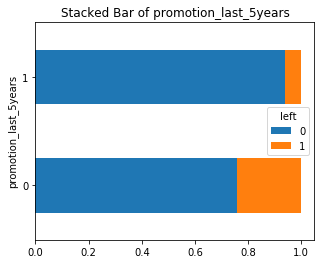

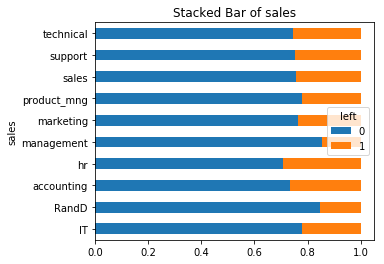

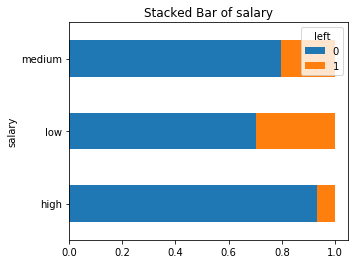

In [49]:
for i in var_cate:
    df_crss = pd.crosstab(df[i], df.left)
    sm = df_crss.sum(axis = 1)
    for k in df_crss.columns:
        df_crss[k] = df_crss[k]/sm
    df_crss.plot.barh(stacked=True)
    plt.title("Stacked Bar of "+ i)
    plt.show()
# seems like `number of project` has effect on left or not, but not in a linear way
# 'Work accident' and 'promotion in last 5 years' will affect left or not
# seems like `management department` has a lower left ratio
# seems like the higher the salary, the more likelihood the employee will stay.

#conclusion:
#     (1) transform `number of project`,`sales` with one-hot encoding
#     (2) transform `salary` into ordered numeric values with 0 = low, 1 = median, 2 = high

#### Feature Engineering

In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [11]:
label_encoder = LabelEncoder()
df["sales"] = label_encoder.fit_transform(df["sales"])
class_sales  = label_encoder.classes_
label_salse = label_encoder.fit_transform(class_sales)
sales_dic = dict(zip(class_sales,label_salse))

In [12]:
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoded = onehot_encoder.fit(df[['number_project',"sales"]])

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [13]:
df_OneHot = pd.DataFrame(onehot_encoded.transform(df[['number_project',"sales"]]),
                         columns = onehot_encoded.get_feature_names().tolist())

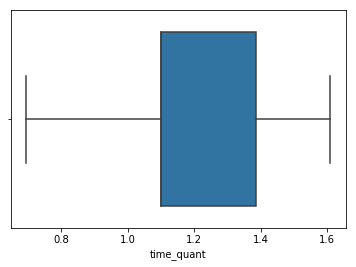

In [14]:
# let's focus on `time_spend_company` variable which has outliers and my three options 
#   (1) repalce the outlier with 90th quantile value, treat it as continuous variable

quant = np.quantile(df["time_spend"], 0.9, axis=0)
df["time_quant"] = [i if i < quant else quant for i in df["time_spend"]]
# After using 90 quantile value as a replacement, the time_spend has not outliers
sns.boxplot(df["time_quant"])


#   (2) bucketize the time_spend to small buckets, treat them as categorical variable
cut_array = np.array([0,2.6,3,4,10])
time2 = pd.cut(df['time_spend_company'], cut_array)
label_encoder = LabelEncoder()
df["time_bucket"] = label_encoder.fit_transform(time2)
class_time  = label_encoder.classes_
label_time = label_encoder.fit_transform(time2)
time_dic = dict(zip(class_time,label_time))

#   (3) Use rule-based(If-Then) algorithm, won't be done here

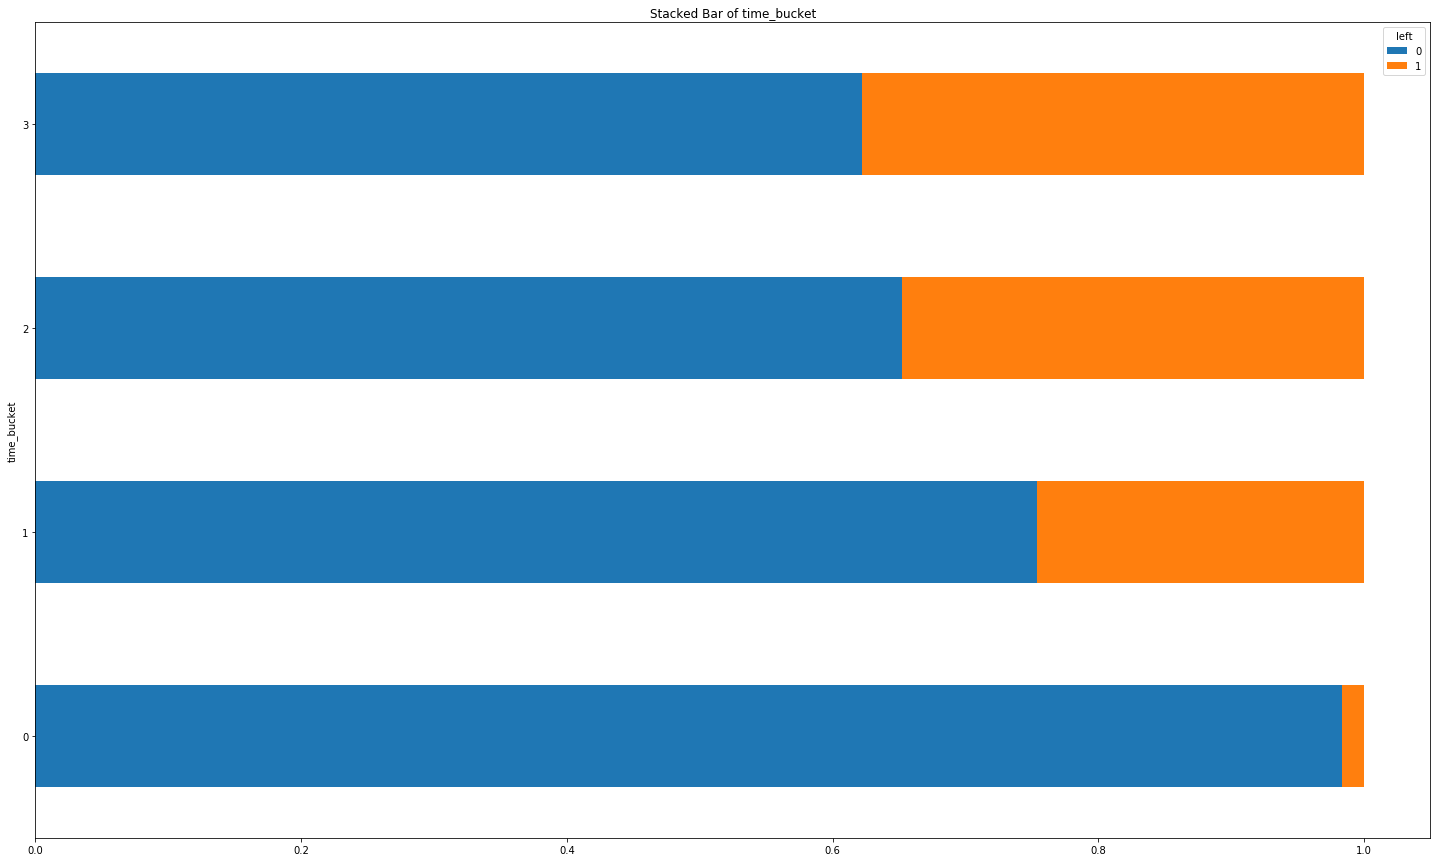

In [299]:
# Briefly explore time_bucket value
# seems like time_bucket has a linear relationship with `left or not`
# we can treat it either as continuous variable or categorical variable
df_crss = pd.crosstab(df.time_bucket, df.left)
sm = df_crss.sum(axis = 1)
for k in df_crss.columns:
    df_crss[k] = df_crss[k]/sm
df_crss.plot.barh(stacked=True)
plt.title("Stacked Bar of time_bucket")
plt.show()

In [15]:
df_all = pd.merge(df,df_OneHot, left_on = df.index, right_on =df_OneHot.index )

In [16]:
origina_var   = ['satisfaction_level', 'last_evaluation',
                 'average_montly_hours', 'time_spend_company', 'Work_accident',
                 'promotion_last_5years', 'x0_2.0', 'x0_3.0', 'x0_4.0', 'x0_5.0', 'x0_6.0',
                 'x0_7.0', 'x1_0.0', 'x1_1.0', 'x1_2.0', 'x1_3.0', 'x1_4.0', 'x1_5.0',
                 'x1_6.0', 'x1_7.0', 'x1_8.0', 'x1_9.0']
opt_quant_var = ['satisfaction_level', 'last_evaluation',
                 'average_montly_hours', 'Work_accident',
                 'promotion_last_5years', 'time_quant',
                 'x0_2.0', 'x0_3.0', 'x0_4.0', 'x0_5.0', 'x0_6.0',
                 'x0_7.0', 'x1_0.0', 'x1_1.0', 'x1_2.0', 'x1_3.0', 'x1_4.0', 'x1_5.0',
                 'x1_6.0', 'x1_7.0', 'x1_8.0', 'x1_9.0']
opt_bucket_var = ['satisfaction_level', 'last_evaluation',
                 'average_montly_hours', 'Work_accident',
                 'promotion_last_5years', 
                 'time_bucket', 'x0_2.0', 'x0_3.0', 'x0_4.0', 'x0_5.0', 'x0_6.0',
                 'x0_7.0', 'x1_0.0', 'x1_1.0', 'x1_2.0', 'x1_3.0', 'x1_4.0', 'x1_5.0',
                 'x1_6.0', 'x1_7.0', 'x1_8.0', 'x1_9.0']

#### Model selection

In [168]:
# Since this is a classification model
# I'd like to choose a model from (1) Logistic Regression,
#                                 (2) SVM,
#                                 (3) Decision Tree,
#                                 (4) Random Forest,
#                                 (5) KNN
#In this case, since the data is a bit imbalanced, I took F1-score as the measurement of model perfomance

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [18]:
# split data into 7/3 for cross-validation
var = origina_var
X = df_all[var]
y = df_all.left

In [19]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X, y, test_size=0.3, random_state=0)
compare_dic = {}

### Feature Selection

In [37]:
# Since the number of features is only 17, I'd prefer using original data first.
# I would double checke it afterwards.
# The Recursive Feature Elimination (RFE) works by recursively removing variables and 
# building a model on those variables that remain. It uses the model accuracy to identify 
# which variables (and combination of variables) contribute the most to predicting the target attribute.
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
rfe = RFE(model, 10)
rfe = rfe.fit(Xtrain, ytrain)
#print(rfe.support_)
#print(rfe.ranking_)
selected_feature = np.array(var)[rfe.support_].tolist()

# Using Selected Features
Xtrain = Xtrain[selected_feature]
Xtest  = Xtest[selected_feature]

# This method make it worse.

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


IndexError: boolean index did not match indexed array along dimension 0; dimension is 22 but corresponding boolean dimension is 10

### Using F1-score as criteria

In [33]:
# Logistic Regression
model_LR = LogisticRegression()
# SVM model
model_SVM = SVC(gamma='auto', C=15.3)
# Decision Tree
model_DT = tree.DecisionTreeClassifier()
#Random Forest
model_RF = RandomForestClassifier(n_estimators = 50, max_depth = 20, random_state=0)
#KNN
model_KNN = KNeighborsClassifier(n_neighbors = 8)


model_list = [model_LR, model_SVM, model_DT, model_RF, model_KNN]
model_name = ["Logistic Regression", "SVM", "Decision Tree", "Random Forest","KNN"]
for i in range(len(model_list)):
    model = model_list[i]
    model.fit(Xtrain, ytrain)
    pred = model.predict(Xtest)
    compare_dic[model_name[i]] = f1_score(ytest, pred, average = None)
    print(metrics.classification_report(ytest, pred))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.91      0.93      0.92      3462
           1       0.74      0.68      0.71      1038

   micro avg       0.87      0.87      0.87      4500
   macro avg       0.82      0.80      0.81      4500
weighted avg       0.87      0.87      0.87      4500

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      3462
           1       0.83      0.72      0.77      1038

   micro avg       0.90      0.90      0.90      4500
   macro avg       0.87      0.84      0.85      4500
weighted avg       0.90      0.90      0.90      4500

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      3462
           1       0.87      0.90      0.88      1038

   micro avg       0.95      0.95      0.95      4500
   macro avg       0.92      0.93      0.92      4500
weighted avg       0.95      0.95      0.95      4500

              preci

15.3 0.9246183206106869


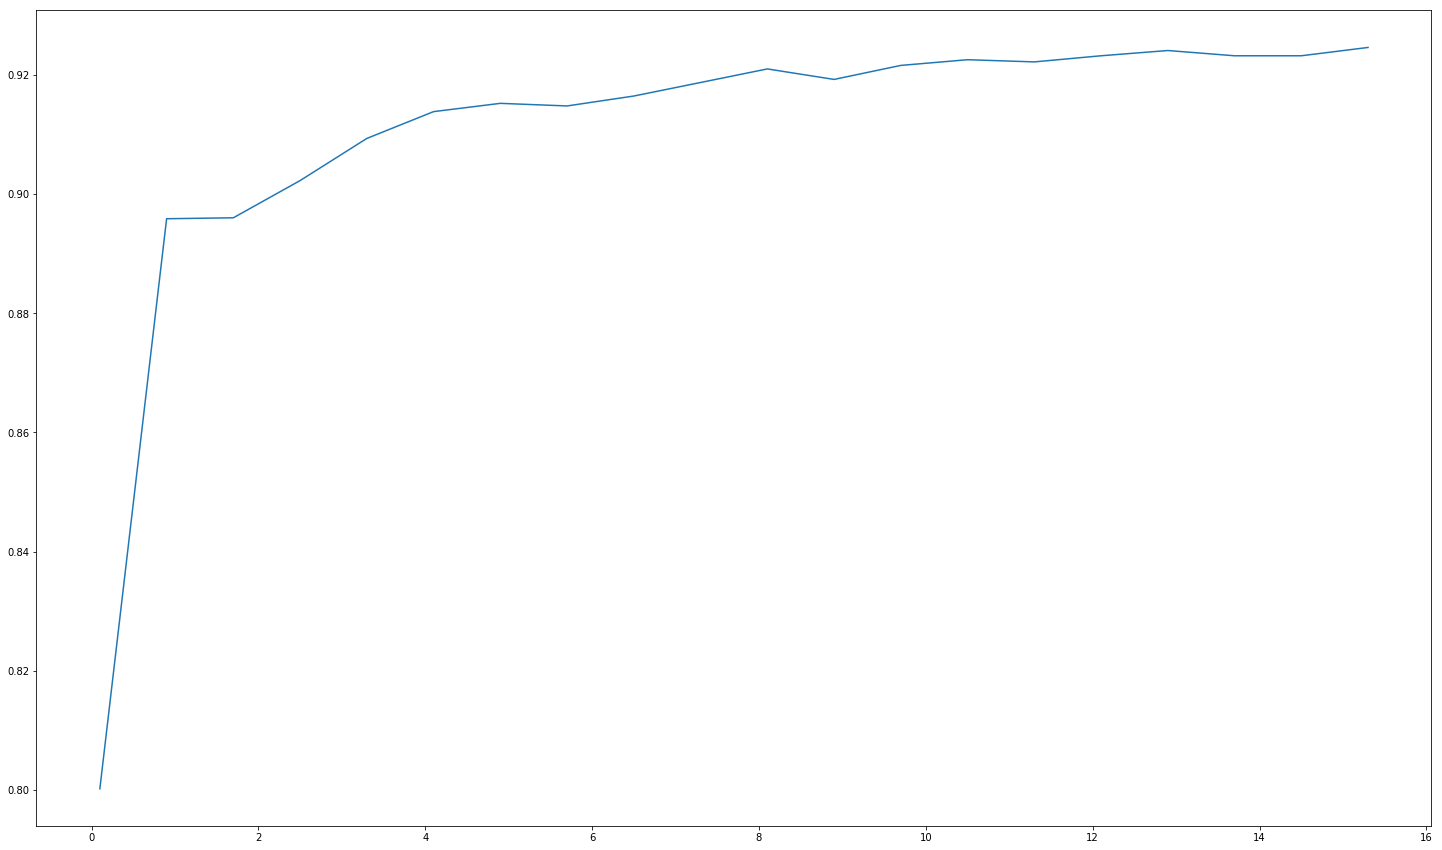

In [242]:
# SVM parameter tunning
Cs = [float(i/10) for i in list(range(1,160,8))]
F1 = []
param = 0 ; curr = 0
for c in Cs :
    model_SVM = SVC(gamma='auto',C=c)
    model_SVM.fit(Xtrain, ytrain)
    pred_SVM = model_SVM.predict(Xtest)
    #compare_dic["SVM"] = f1_score(ytest, pred_SVM,average = None)
    F1.append(f1_score(ytest, pred_SVM))
    if f1_score(ytest, pred_SVM) > curr:
        param = c ; curr = f1_score(ytest, pred_SVM)
    #print(metrics.classification_report(ytest, pred_SVM))
plt.plot(Cs, F1)
print(param,curr)

In [243]:
# Random forest parameter tunning
n_estimators = [10,50,100,300,350]; max_depth = [2,5,8,10,14,16,20,25]

n_max = 0 ; m_max = 0
curr = 0
for n in n_estimators:
    for m in max_depth :
        model_RF = RandomForestClassifier(n_estimators = n, max_depth = m, random_state=0)
        model_RF.fit(Xtrain, ytrain)
        pred_RF = model_RF.predict(Xtest)
        if f1_score(ytest, pred_RF) > curr:
            n_max = n ; m_max = m ; curr = f1_score(ytest, pred_RF)
print(n_max, m_max,curr)

50 20 0.9795520934761441


In [245]:
# KNN parameter tunning
num_neighbors = [3,5,8,10,15,20,25]
curr = 0 ;
F1 = []
param = 0
for n in num_neighbors:
    model_KNN = KNeighborsClassifier(n_neighbors = n)
    model_KNN.fit(Xtrain, ytrain)
    pred_KNN = model_KNN.predict(Xtest)
    F1.append(f1_score(ytest, pred_KNN))
    if f1_score(ytest, pred_KNN) > curr:
        param = n ; curr = f1_score(ytest, pred_KNN)
print(param, curr)

8 0.896067415730337


In [34]:
compare_dic

{'Logistic Regression': array([0.91785511, 0.71026157]),
 'SVM': array([0.93703914, 0.77207392]),
 'Decision Tree': array([0.96413533, 0.88310459]),
 'Random Forest': array([0.97186775, 0.90779468]),
 'KNN': array([0.96072248, 0.86462451])}

### Using GridSearchCV function to tune parameters

In [312]:
# Logistic Regression
parameters = {"C" : [float(i/10) for i in list(range(1,160,8))]}
clf_LR = LogisticRegression()
model_LR = GridSearchCV(clf_LR, parameters, cv = 5)
# SVM model
parameters = {"C" : [float(i/10) for i in list(range(1,160,8))]}
clf_SVM = SVC(gamma='auto')
model_SVM = GridSearchCV(clf_SVM, parameters, cv = 5)
# Decision Tree
parameters = {}
clf_DT = tree.DecisionTreeClassifier()
model_DT = GridSearchCV(clf_DT, parameters, cv = 5)
#Random Forest
parameters = {"n_estimators" : [10,50,100,300,350], "max_depth" : [2,5,8,10,14,16,20,25]}
clf_RF = RandomForestClassifier(random_state=0)
model_RF = GridSearchCV(clf_RF, parameters, cv = 5)
#KNN
parameters = {"n_neighbors" : [3,5,8,10,15,20,25]}
clf_KNN = KNeighborsClassifier()
model_KNN = GridSearchCV(clf_KNN, parameters, cv = 5)


model_list = [model_LR, model_SVM, model_DT, model_RF, model_KNN]
model_name = ["Logistic Regression", "SVM", "Decision Tree", "Random Forest","KNN"]
for i in range(len(model_list)):
    model = model_list[i]
    model.fit(Xtrain, ytrain)
    pred = model.predict(Xtest)
    compare_dic[model_name[i]] = f1_score(ytest, pred, average = None)
    print(metrics.classification_report(ytest, pred))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      3462
           1       0.74      0.68      0.71      1038

   micro avg       0.87      0.87      0.87      4500
   macro avg       0.82      0.80      0.81      4500
weighted avg       0.87      0.87      0.87      4500

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      3462
           1       0.91      0.93      0.92      1038

   micro avg       0.96      0.96      0.96      4500
   macro avg       0.95      0.95      0.95      4500
weighted avg       0.96      0.96      0.96      4500

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3462
           1       0.94      0.97      0.96      1038

   micro avg       0.98      0.98      0.98      4500
   macro avg       0.96      0.98      0.97      4500
weighted avg       0.98      0.98      0.98      4500

              preci

In [314]:
compare_dic

{'Logistic Regression': array([0.91648822, 0.70676692]),
 'SVM': array([0.97667681, 0.92322365]),
 'Decision Tree': array([0.98619387, 0.95516753]),
 'Random Forest': array([0.99395335, 0.97955209]),
 'KNN': array([0.96765734, 0.89606742])}

In [315]:
# Since Random forest has a better performance, I would like to be more specific on the parameter set

In [317]:
# Random forest parameter tunning
n_estimators = [10, 50, 100, 150, 300, 350, 400, 450, 500]
max_depth    = [2, 5, 8, 10, 14, 16, 20, 25, 27]

n_max = 0 
m_max = 0
curr  = 0
for n in n_estimators:
    for m in max_depth :
        model_RF = RandomForestClassifier(n_estimators = n, max_depth = m, random_state=0)
        model_RF.fit(Xtrain, ytrain)
        pred_RF = model_RF.predict(Xtest)
        if f1_score(ytest, pred_RF) > curr:
            n_max = n ; m_max = m ; curr = f1_score(ytest, pred_RF)
print(n_max, m_max, curr)

50 20 0.9795520934761441


### Cross Validation

In [307]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [318]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = RandomForestClassifier(n_estimators = n_max, max_depth = m_max)
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, Xtrain, ytrain, cv=kfold, scoring=scoring)
model_rf = modelCV.fit( Xtrain, ytrain)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))
print(classification_report(ytest, model_rf.predict(Xtest)))

10-fold cross validation average accuracy: 0.989
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3462
           1       0.99      0.97      0.98      1038

   micro avg       0.99      0.99      0.99      4500
   macro avg       0.99      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500



### Confusion Metrix

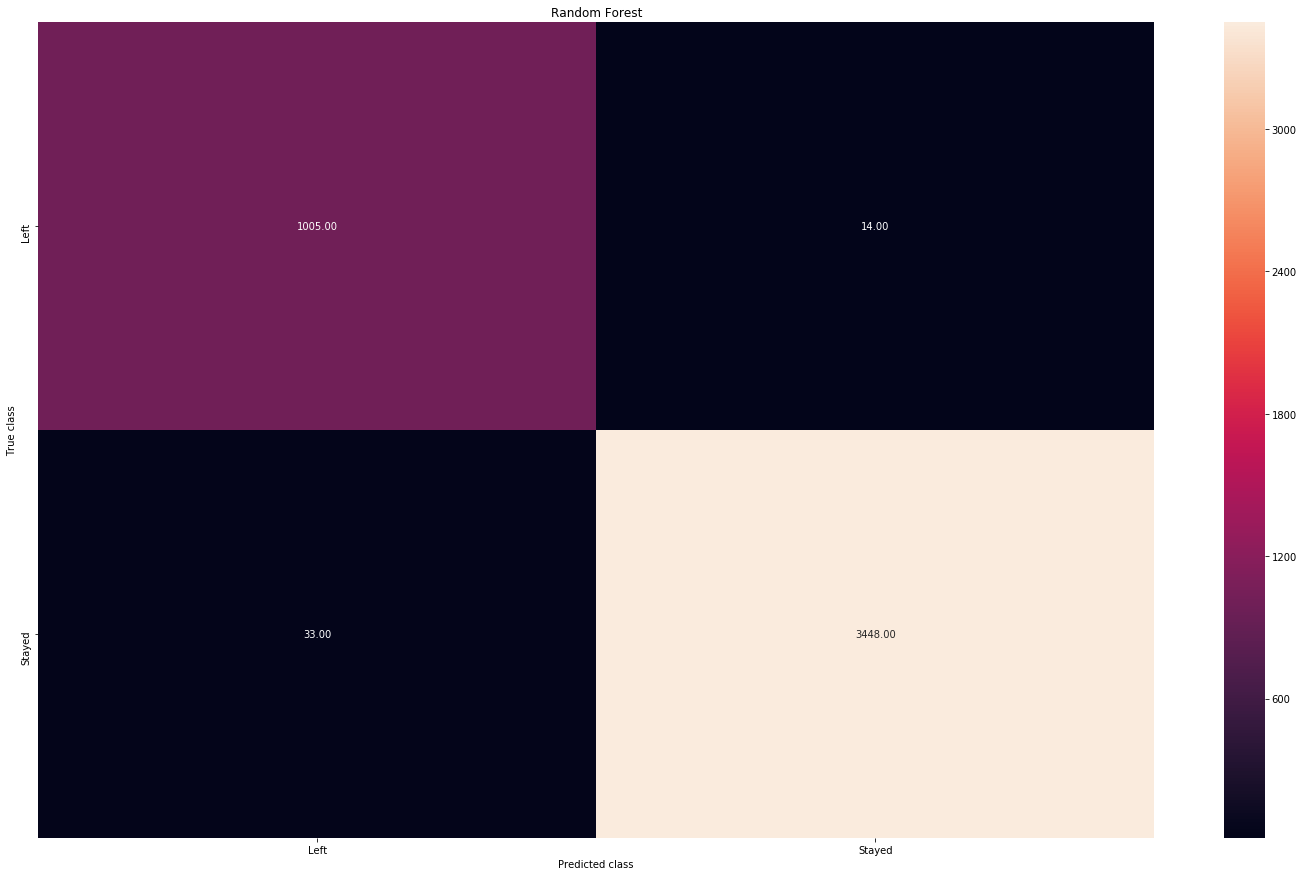

In [297]:
y_pred = model_rf.predict(Xtest)
from sklearn.metrics import confusion_matrix
import seaborn as sns
forest_cm = metrics.confusion_matrix(y_pred, ytest, [1,0])
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.savefig('random_forest')

### Feature Importance for Random Forest Model

In [287]:
feature_labels = var
importance = model_rf.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] * 100.0)))
    
# Using original time_spend_company.
# In this sineario, time_spend_company plays a very important role.
# The overall acurracy is 0.989.

x1_5.0-0.11%
x1_6.0-0.14%
x1_0.0-0.15%
x1_3.0-0.16%
x1_4.0-0.17%
x1_2.0-0.18%
x1_1.0-0.21%
promotion_last_5years-0.22%
x1_8.0-0.28%
x1_7.0-0.30%
x1_9.0-0.31%
Work_accident-0.73%
x0_7.0-1.27%
x0_5.0-1.67%
x0_6.0-1.84%
x0_4.0-2.58%
x0_3.0-4.34%
x0_2.0-9.57%
last_evaluation-14.66%
average_montly_hours-15.04%
time_spend_company-16.37%
satisfaction_level-29.68%


In [298]:
feature_labels = var
importance = model_rf.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] * 100.0)))

# Using time_spent_quant here.
# In this sineario, time_spend_company still plays a very important role.
# Overall accuracy is 0.989.

x1_5.0-0.14%
x1_3.0-0.14%
x1_0.0-0.16%
x1_6.0-0.16%
x1_4.0-0.18%
x1_1.0-0.20%
x1_2.0-0.20%
promotion_last_5years-0.24%
x1_8.0-0.29%
x1_7.0-0.31%
x1_9.0-0.33%
Work_accident-0.92%
x0_7.0-1.74%
x0_6.0-1.75%
x0_5.0-1.96%
x0_4.0-2.41%
x0_3.0-4.40%
x0_2.0-9.49%
last_evaluation-13.20%
average_montly_hours-15.28%
time_quant-16.33%
satisfaction_level-30.19%


In [309]:
feature_labels = var
importance = model_rf.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] * 100.0)))

# Using time_spent_bucket as continuous variable here.
# In this sineario, time_spend_company still plays a very important role.
# Overall accuracy is 0.989.

x1_5.0-0.13%
x1_3.0-0.15%
x1_0.0-0.15%
x1_6.0-0.16%
x1_4.0-0.18%
x1_2.0-0.18%
x1_1.0-0.20%
promotion_last_5years-0.25%
x1_8.0-0.28%
x1_7.0-0.32%
x1_9.0-0.34%
Work_accident-0.80%
x0_7.0-1.74%
x0_6.0-1.84%
x0_5.0-2.06%
x0_4.0-2.45%
x0_3.0-4.53%
x0_2.0-9.36%
last_evaluation-13.13%
average_montly_hours-15.67%
time_bucket-16.64%
satisfaction_level-29.45%


### Summary